<a href="https://colab.research.google.com/github/julienbonin/MachineLearningApplications/blob/master/Chapters/Chapter3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1) # Returns a dicitonary
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [38]:
X = mnist['data'] # Returns an array (matrix since each entry is an array) of pixel images (i.e. hand writen images of numbers)
y = mnist['target'] # Classification labels
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


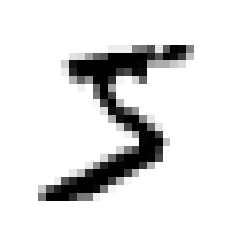

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0] # The first entry of the data (hand writen digits) in vector form
some_digit_image = some_digit.reshape(28,28) # Reshape the first entry into a 28x28 matrix since each image is 28x28 pixels

plt.imshow(some_digit_image, cmap=mpl.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

In [ ]:
import numpy as np # had to do this b/c it was loaded in chapter 2 (a seperate notebook)
y = y.astype(np.uint8) # cast y values from string to int

In [39]:
# SEPARATE THE TRAINING SET AND TEST SET
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

#Training A Binary Classifier

In [ ]:
y_train_5 = (y_train == 5) # Create an array where each index that contains a 5 (in X_train) is true and each index that does not contain a 5 is false
y_test_5 = (y_test == 5)

In [ ]:
from sklearn.linear_model import SGDClassifier # Stochastic Gradient Decent Classifier

sgd_clf = SGDClassifier(random_state=42) # This will be the 'model' after you train it.
sgd_clf.fit(X_train, y_train_5) # Train model

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
sgd_clf.predict([some_digit]) # recall: some_digit = X[0] <- is a 5

array([ True])

# **Performance Measures**

##Measuring Accuracy Using Cross-Validation

<center>Implementing Cross-Validation</center>

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
  clone_clf = clone(sgd_clf)
  X_train_folds = X_train[train_index]
  y_train_folds = y_train_5[train_index]
  X_test_fold = X_train[test_index]
  y_test_fold = y_train_5[test_index]

  clone_clf.fit(X_train_folds, y_train_folds)
  y_pred = clone_clf.predict(X_test_fold)
  n_correct = sum(y_pred == y_test_fold)
  print(n_correct / len(y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.95035
0.96035
0.9604


In [ ]:
from sklearn.model_selection import cross_val_score
#cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')
cross_val_score(sgd_clf, X_test, y_test, cv=3, scoring='accuracy')

array([0.82783443, 0.85448545, 0.8919892 ])

In [ ]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
  def fit(self, X, y=None):
    pass

  def predict(self, X):
    return np.zeros((len(X),1), dtype=bool)


never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

#Confusion Matrix


In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3) # Returns an array of predictions (i.e. something like [True, False, False, True, ...])  

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

#Precision and Recall

In [ ]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_train_5, y_train_pred)
recall = recall_score(y_train_5, y_train_pred)

print('Precision: ', precision)
print('Recall: ', recall)

Precision:  0.8370879772350012
Recall:  0.6511713705958311


In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

#Precision/Recall Tradeoff

In [ ]:
y_scores = sgd_clf.decision_function([some_digit])
print('y_scores: ',y_scores)

threshold = 0
print('y_some_digit_pred: ', y_scores > threshold)

y_scores:  [2164.22030239]
y_some_digit_pred:  [ True]


In [ ]:
threshold = 8000
print('y_some_digit_pred: ', y_scores > threshold)

y_some_digit_pred:  [False]


In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')   # Returns an array of decision scores. Will be used to compute precision_recall_curve()

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

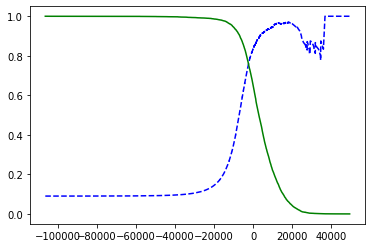

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
  plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [ ]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
print('threshold_90_precision: ', threshold_90_precision)

threshold_90_precision:  3370.0194991439557


In [ ]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [ ]:
print('Precision Score: ', precision_score(y_train_5, y_train_pred_90))
print('Recall Score: ', recall_score(y_train_5, y_train_pred_90))

Precision Score:  0.9000345901072293
Recall Score:  0.4799852425751706


##The ROC Curve

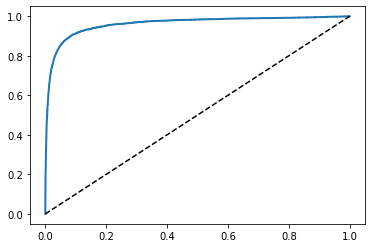

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0,1],[0,1], 'k--')

plot_roc_curve(fpr, tpr)
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
print('Roc_Auc_Score: ', roc_auc_score(y_train_5, y_scores))

Roc_Auc_Score:  0.9604938554008616


In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')

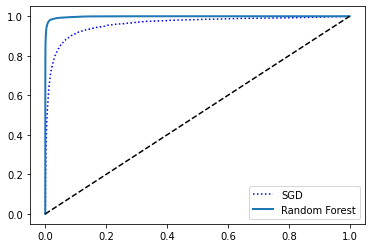

In [ ]:
y_scores_forest = y_probas_forest[:, 1] # all rows in second column

fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

plt.plot(fpr, tpr, 'b:', label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, 'Random Forest')
plt.legend(loc='lower right')
plt.show()

In [ ]:
print('Roc_auc_score: ', roc_auc_score(y_train_5, y_scores_forest))

Roc_auc_score:  0.9983436731328145


## Multiclass Classification

In [ ]:
sgd_clf.fit(X_train, y_train) # y_train is the label for each digin in X_train, instead of 5 or not 5
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [ ]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([5], dtype=uint8)

In [ ]:
 # Train RandomForestClassifier - Doesn't need OvA or OvO b/c it handles multiple classes natively
 forest_clf.fit(X_train, y_train)
 forest_clf.predict([some_digit])

array([5], dtype=uint8)

In [ ]:
forest_clf.predict_proba([some_digit])

array([[0.  , 0.  , 0.01, 0.08, 0.  , 0.9 , 0.  , 0.  , 0.  , 0.01]])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

#Error Analysis


#Chapter 3 - Exercises

##Problem 1

#### Try to build a classifier for the MNIST dataset that achieves over 97% accuracy on the test set. Hint: the KNeighborsClassifier works quite well for this task; you just need to find good hyperparameter values (try a grid search on the weights and n_neighbors hyperparameters).

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# This was my original code
#knn_clr = KNeighborsClassifier(n_neighbors=5, n_jobs=-1,algorithm='brute',weights='distance')
#scores = cross_val_score(knn_clr, X_train, y_train, cv=3, scoring='accuracy')
#knn_clr = KNeighborsClassifier(n_neighbors=100, n_jobs=-1,algorithm='brute',weights='distance')
#scores = cross_val_score(knn_clr, X_train, y_train, cv=3, scoring='accuracy')
#knn_clr = KNeighborsClassifier(n_neighbors=500, n_jobs=-1,algorithm='brute',weights='distance')
#scores = cross_val_score(knn_clr, X_train, y_train, cv=3, scoring='accuracy')
#knn_clr.fit(X_train, y_train)

# The code below is from a youtube video since I was having issues with the above code. (https://www.youtube.com/watch?v=Gol_qOgRqfA)
k_range = range(1,31)
k_scores = []
for k in k_range:
  knn_clf = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn_clf, X_train, y_train, cv=4, scoring='accuracy')
  k_scores.append(scores.mean())
print('K-Scores: ', k_scores)

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [ ]:
from sklearn.model_selection import GridSearchCV
import numpy as np

k_range = np.array(range(1, 31))
print(k_range,'\n')

par_grid = {'n_neighbors':k_range}
print(par_grid)
knn_clf = KNeighborsClassifier(n_jobs=-1,algorithm='brute')
grid = GridSearchCV(knn_clf, par_grid, cv=5, scoring='accuracy')

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30] 

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])}


In [ ]:
grid.fit(X_train, y_train) # Gettin a similar error as below

In [1]:
# This code is from the solutions

from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}]

knn_clf = KNeighborsClassifier(n_jobs=-1)
grid_search = GridSearchCV(knn_clf, param_grid, cv=3, verbose=3)
grid_search.fit(X_train, y_train)

NameError: ignored

## Problem 2

#### Write a function that can shift an MNIST image in any direction (left, right, up, or down) by one pixel. Then, for each image in the training set, create four shif‐ted copies (one per direction) and add them to the training set. Finally, train your best model on this expanded training set and measure its accuracy on the test set. You should observe that your model performs even better now! This technique of artificially growing the training set is called data augmentation or training set expansion.

In [ ]:
#from sklearn.model_selection import train_test_split # use to split the new test and train data
import numpy as np

#def shiftLeft(image):
Xorig = X[0]
Image = X[0].reshape((28,28))
newrow = np.zeros(28)
i=0
while (i<20):
  np.delete(Image,0)
  np.append(Image, newrow)
  i += 1

X[0] = Image.flatten()

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

#some_digit = X[0] # The first entry of the data (hand writen digits) in vector form
#some_digit_image = some_digit.reshape(28,28) # Reshape the first entry into a 28x28 matrix since each image is 28x28 pixels
digit1 = Xorig.reshape((28,28))
digit2 = Image.reshape((28,28))


plt.imshow(digit1, cmap=mpl.cm.binary, interpolation='nearest')


plt.show()

In [ ]:
plt.imshow(digit2, cmap=mpl.cm.binary, interpolation='nearest')

plt.show()



##Problem 3

####Tackle the Titanic dataset. A great place to start is on Kaggle.

In [ ]:
# This cell is code I wrote for this problem. 
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

# import data from github
train_url = 'https://raw.githubusercontent.com/julienbonin/MachineLearningApplications/master/Chapters/Chapter3/train.csv'
test_url = 'https://raw.githubusercontent.com/julienbonin/MachineLearningApplications/master/Chapters/Chapter3/test.csv'

# I dropped some data that I thought wouldn't be as relevant as others.
# I also couldn't come up with a good way of converting these values into numbers.
X_train = pd.read_csv(train_url).drop(['Name','Ticket','Cabin', 'Embarked'], axis=1)
X_test = pd.read_csv(test_url).drop(['Name','Ticket','Cabin', 'Embarked'], axis=1)
X_test = X_test[X_train.drop(['Survived'], axis=1).columns.values] # this line reorders the columns of the test set to match the train set. I'm not sure if this will make a difference.

# set NAN values to 0
X_train.fillna(0.0)
X_test.fillna(0.0)

# Convert sex 'male/female' into '0/1'
# Since there ML algorithms like numbers, I decided to convert the 'Sex' into
# 1 or 0
new_data = []
for row in X_train['Sex']:
  if (row == 'male'):
    new_data.append(0)
  else:
    new_data.append(1)
X_train['Sex'] = new_data

# Do same thing for test set
new_data = []
for row in X_test['Sex']:
  if (row == 'male'):
    new_data.append(0)
  else:
    new_data.append(1)
X_test['Sex'] = new_data

# These are the labels we'll be using.
y_train = X_train['Survived']

forest_clf.fit(X_train, y_train) # I'm running into an error on this line. For some reason, fillna(0) isn't working on X_train above 

#cross_val_score(forest_clf, X_test, y_test, cv=3, scoring='accuracy')



     PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare
0              1         0       3    0  22.0      1      0   7.2500
1              2         1       1    1  38.0      1      0  71.2833
2              3         1       3    1  26.0      0      0   7.9250
3              4         1       1    1  35.0      1      0  53.1000
4              5         0       3    0  35.0      0      0   8.0500
..           ...       ...     ...  ...   ...    ...    ...      ...
886          887         0       2    0  27.0      0      0  13.0000
887          888         1       1    1  19.0      0      0  30.0000
888          889         0       3    1   NaN      1      2  23.4500
889          890         1       1    0  26.0      0      0  30.0000
890          891         0       3    0  32.0      0      0   7.7500

[891 rows x 8 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


ValueError: ignored